<center><img src="https://matematica.usm.cl/wp-content/themes/dmatUSM/assets/img/logoDMAT2.png" title="Title text" /></center>
<hr style="height:2px;border:none"/>
<h1 align='center'> Modelos GARCH - Simulación estocástica</h1>
<h2 align='center'> Diego Astaburuaga, David Rivas </h2>
<hr style="height:2px;border:none"/>

<p style="text-align: center;">
    <img src="https://github.com/Darkrayyss/Proyecto-Final-MAT281/raw/307f0d0f14aefbff8de7698d0c645d680ced6994/Carpet%20for%20Test%201/images/Capy2.png" alt="Capybara trabajando" width="300" style="border: 7px solid black;">
    <br>
    <small>(Humor) Foto de Diego discutiendo con chatgpt.</small>
</p>

# Definiciones y resultados utilizados

**Definición:** (Proceso GARCH fuerte) Sea $(\eta_t)$ una secuencia de variables independientes e idénticamente distribuidas con distribuci\'on $\eta$. El proceso $(\epsilon_t)$ se le denota como proceso $\operatorname{GARCH}(p,q)$ fuerte (con respecto a la secuencia $(\eta_t)$) si
\begin{equation}
    \left\{
    \begin{aligned}
        \epsilon_t &= \sigma_t \eta_t\\
        \sigma_t^2 &= \omega + \sum_{i=1}^p \alpha_i \epsilon_{t-i}^2+\sum_{j=1}^q\beta_j\sigma_{t-j}^2
    \end{aligned}
    \right.
\end{equation}
donde los $\alpha_i$ y $\beta_j$ son constantes no negativas y $\omega$ es una constante estrictamente positiva.

# Importacion de bibliotecas necesarias

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Librería arch
# ==============================================================================
from arch import arch_model
from arch.univariate import GARCH, ConstantMean, SkewStudent, Normal

# Librería statsmodels
# ==============================================================================
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess

# Otros
# ==============================================================================
from scipy.stats import norm

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configuración general de gráficos
sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [3]:
# Crear un estado inicial para la generación de números aleatorios
rs = np.random.RandomState([892380934, 189201902, 129129894, 9890437])
# Guardar el estado inicial para poder reiniciarlo más tarde
state = rs.get_state()

# Ejemplo de uso de librería

In [24]:
# Establecer la semilla para reproducibilidad
np.random.seed(42)

# Definir los parámetros del modelo GARCH
p = 1
q = 1
mu = 0
omega = 0.2
alpha_array= np.random.rand(p)
beta_array = np.random.rand(q)
n_datos = 100_000

# Garantizar estacionaridad
if np.sum(alpha_array) + np.sum(beta_array) >= 1:
    scale_factor = 0.9 / (np.sum(alpha_array) + np.sum(beta_array))
    alpha_array = alpha_array * scale_factor
    beta_array = beta_array * scale_factor

# Definir los parámetros del modelo
cm_params = np.array([mu])
garch_params = np.concatenate((np.array([omega]), alpha_array, beta_array))
params = np.concatenate((cm_params, garch_params))

# Crear un modelo GARCH utilizando arch_model
modelo_garch = arch_model(None, p=p, o=0, q=q)

# Establece secuencia de residuos
rs = np.random.RandomState([892380934, 189201902, 129129894, 9890437])
modelo_garch.distribution = Normal(seed=rs)

# Simular una única trayectoria del modelo GARCH
sim_data = modelo_garch.simulate(params=params, nobs=n_datos)
resids, variance = sim_data['data'], sim_data['volatility']

# Muestra los datos simulados
sim_data

,data,volatility,errors
0,-1.086573,0.994189,-1.086573
1,0.846563,1.066989,0.846563
2,0.071886,1.057039,0.071886
3,-1.199303,0.960580,-1.199303
4,1.667860,1.077771,1.667860
...,...,...,...
99995,0.447829,0.862319,0.447829
99996,-0.234430,0.855049,-0.234430
99997,0.169984,0.828260,0.169984
99998,0.122836,0.806394,0.122836


# Histogramas de modelos GARCH

A partir de este punto se debe tener en cuenta que $\eta\equiv N(0,1)$.

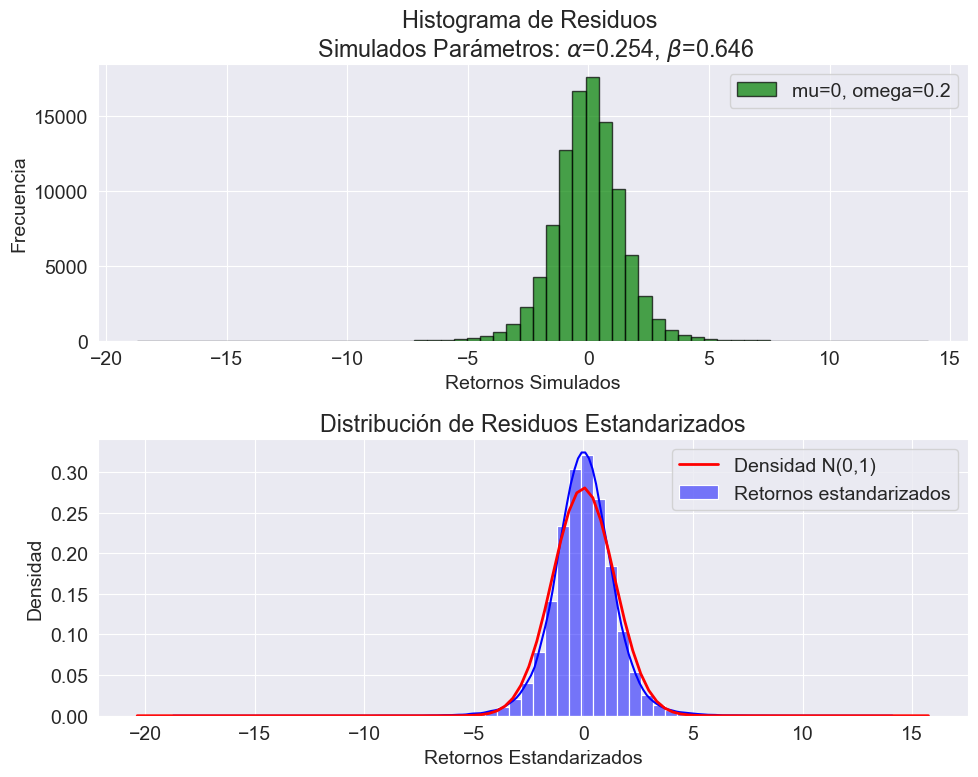

In [37]:
# Establecer la semilla para reproducibilidad
np.random.seed(42)

# Crear un estado inicial para la generación de números aleatorios
rs = np.random.RandomState([892380934, 189201902, 129129894, 9890437])
# Guardar el estado inicial para poder reiniciarlo más tarde
state = rs.get_state()

# Definir los parámetros del modelo GARCH
p = 1
q = 1
mu = 0
omega = 0.2
alpha_array= np.random.rand(p)
beta_array = np.random.rand(q)

# Garantizar estacionaridad
if np.sum(alpha_array) + np.sum(beta_array) >= 1:
    scale_factor = 0.9 / (np.sum(alpha_array) + np.sum(beta_array))
    alpha_array = alpha_array * scale_factor
    beta_array = beta_array * scale_factor

n_datos = 100_000

# Definir un modelo de media constante (ConstantMean)
# con volatilidad GARCH y distribución normal
cm = ConstantMean()
cm.volatility = GARCH(p=p, o=0, q=q)
cm.distribution = Normal(seed=rs)

# Definir los parámetros del modelo
cm_params = np.array([mu])
garch_params = np.concatenate((np.array([omega]), alpha_array, beta_array))
params = np.concatenate((cm_params, garch_params))

# Simular datos con el modelo
sim_data = cm.simulate(params, n_datos)

# Muestra los datos simulados
sim_data

# Crear dos subgráficos, uno encima del otro
plt.figure(figsize=(10, 8))

# Primer gráfico: Histograma de los retornos simulados
plt.subplot(2, 1, 1)
plt.hist(sim_data["data"], bins=60, color='green', alpha=0.7, edgecolor='black', label=f'mu={mu}, omega={omega}')

# Añadir etiquetas y título
plt.xlabel('Retornos Simulados')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos \n Simulados Parámetros:'+fr' $\alpha$={alpha_array[0]:.3f}, $\beta$={beta_array[0]:.3f}')
plt.legend()  # Agregar leyenda

# Segundo gráfico: Residuos estandarizados y densidad teórica
plt.subplot(2, 1, 2)
sns.histplot(sim_data["data"], color='blue', kde=True, stat='density', bins=60, label='Retornos estandarizados')
plt.title('Distribución de Residuos Estandarizados')
plt.xlabel('Retornos Estandarizados')
plt.ylabel('Densidad')

# Añadir la curva de densidad teórica (normal 0,1)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(sim_data["data"]), np.std(sim_data["data"]))
plt.plot(x, p, 'r', linewidth=2, label='Densidad N(0,1)')

# Añadir leyenda
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# Comportamiento cualitativo de trayectorias.

Se busca hacer realizaciones de los procesos GARCH(p,q) para hacer un recopilatorio del comportamiento cualitativo de las trayectorías en función de los ordenes de $p,q$ y de la magnitud de los parámetros, para esta última parte, se utilizará el popular modelo $GARCH(1,1)$ para distintos $\alpha$ y $\beta$. Se debe tener en cuenta que los parámetros deben ser estrictamente positivos y que deben verificar la condición de estacionariedad.

## No estacionariedad

Se simula un proceso $\operatorname{GARCH}(1,1)$ con $\alpha=0.7,\beta=0.7$ lo cual claramente viola la condicion de estacionariedad.

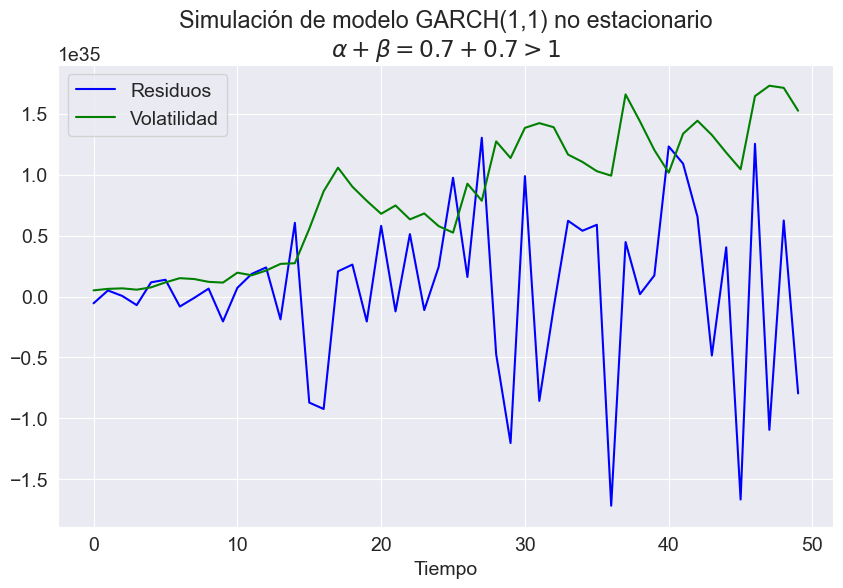

In [46]:
# Establecer la semilla para reproducibilidad
np.random.seed(42)

# Definir los parámetros del modelo GARCH
p = 1
q = 1
mu = 0
omega = 0.2
alpha_array= np.array([0.7])
beta_array = np.array([0.7])
n_datos = 50

# Definir los parámetros del modelo
cm_params = np.array([mu])
garch_params = np.concatenate((np.array([omega]), alpha_array, beta_array))
params = np.concatenate((cm_params, garch_params))

# Crear un modelo GARCH utilizando arch_model
modelo_garch = arch_model(None, p=p, o=0, q=q)

# Establece secuencia de residuos
rs = np.random.RandomState([892380934, 189201902, 129129894, 9890437])
modelo_garch.distribution = Normal(seed=rs)

# Simular una única trayectoria del modelo GARCH
sim_data = modelo_garch.simulate(params=params, nobs=n_datos)

returns, volatility = sim_data['data'], sim_data['volatility']

# Plot the simulated GARCH(1,1) process
plt.figure(figsize=(10, 6))
plt.plot(returns, label='Residuos', color='blue')
plt.plot(volatility, label='Volatilidad', color='green')
plt.title('Simulación de modelo GARCH(1,1) no estacionario'+'\n'+fr'$\alpha+\beta=0.7+0.7>1$')
plt.xlabel('Tiempo')
plt.legend()
plt.grid(True)
plt.show()

se observa que claramente tanto los residuos como la volatilidad crecen de forma indefinida.

## Trayectorías GARCH(1,1)

### Trayetorías para distintos beta dado un alpha fijo

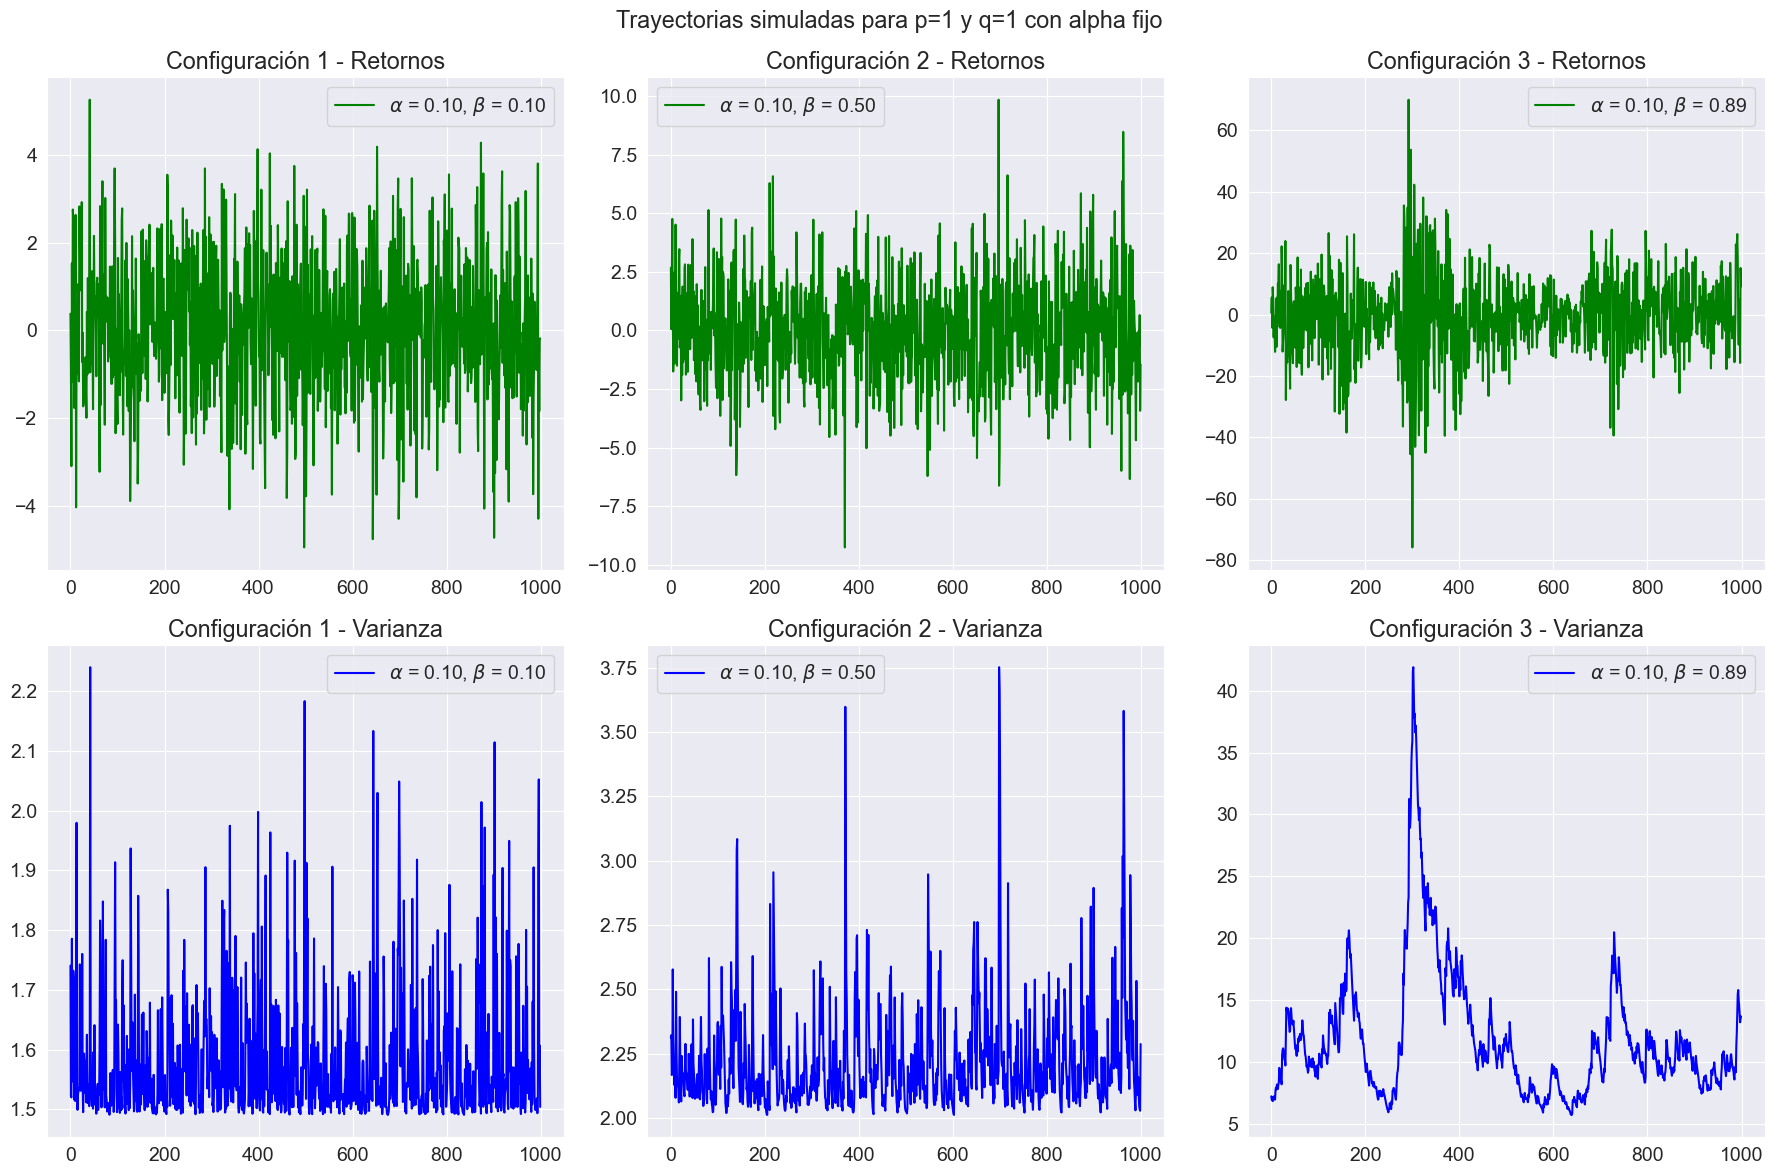

In [45]:
# Hiperparámetros
p = 1
q = 1

# Parámetros
mu = 0
omega = 2
alpha = 0.1  # Valor fijo de alpha

# Valores de beta para cada gráfica
beta_values = [0.1, 0.5, 0.89]

n_datos = 1000

# Semilla para reproducibilidad
np.random.seed(42)

# Crear y simular el modelo GARCH para configuraciones diferentes de beta
sim_mod = arch_model(None, p=p, o=0, q=q, dist="normal")
datos_simulados_retornos = []
datos_simulados_varianza = []

# Graficar las trayectorias simuladas en una grilla 2x3
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for i in range(len(beta_values)):
    # Asegurar estacionaridad
    if alpha + beta_values[i] >= 1:
        scale_factor = 0.9 / (alpha + beta_values[i])
        alpha_scaled = alpha * scale_factor
        beta_scaled = beta_values[i] * scale_factor
    else:
        alpha_scaled = alpha
        beta_scaled = beta_values[i]

    params = {"mu": mu, "omega": omega, f"alpha[1]": alpha_scaled, f"beta[1]": beta_scaled}
    param = pd.Series(params)
    sim_data = sim_mod.simulate(param, n_datos)
    datos_simulados_retornos.append(sim_data["data"])

    # Calcular varianza condicional
    datos_simulados_varianza.append(sim_data["volatility"])

    # Gráficos para la primera fila (retornos)
    axs[0, i].plot(datos_simulados_retornos[i], label=fr'$\alpha$ = {alpha_scaled:.2f}, $\beta$ = {beta_scaled:.2f}', color='green')
    axs[0, i].set_title(fr'Configuración {i+1} - Retornos')
    axs[0, i].legend()

    # Gráficos para la segunda fila (varianza)
    axs[1, i].plot(datos_simulados_varianza[i], label=fr'$\alpha$ = {alpha_scaled:.2f}, $\beta$ = {beta_scaled:.2f}', color='blue')
    axs[1, i].set_title(fr'Configuración {i+1} - Varianza')
    axs[1, i].legend()

plt.suptitle(f'Trayectorias simuladas para p={p} y q={q} con alpha fijo')
plt.tight_layout()
plt.show()

### Trayetorías para distintos alphas dado un beta fijo

## Variación de ordenes p y q